# 1. Introduction <a id='1.'></a>
In this exercise we will take a first look at a reinforcement learning environment, its components and modify the reward function of a simple agent.

In this notebook two environments are used: Cartpole and Reacher. The cartpole environment is taken from [OpenAI's Gym library](https://www.gymlibrary.dev/). The reacher environment is custom made (and defined in ```reacher.py```) but utilizes the Gym API.

## 1.1 Learning Objectives: <a id='1.1'></a>
- To become familiar with assignment structure and the agent-environment relationshp
- To understand the effects of stochasticity
- To understand and explore the effects of task definition

## 1.2 Code Structure & Files <a id='1.2'></a>

The ```train.py``` file instantiates the environment and the RL agent that acts in it. The ```agent.py``` file contains the implementation of a simple reinforcement learning agent; for the sake of this exercise, you can assume it to be a black box (you don’t need to understand how it works, although you are encouraged to study it in more detail). You don’t have to edit any other file other than ```ex1.ipynb``` to complete this exercise.
```
├───cfg                  # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                 # Images used in notebook
├───results 
│   ├───logging          # Contains logged data
│   ├───model            # Contains the policies learned
│   └───video            # Contains videos for each environment
│       └───CartPole-v0
│       │  └───test      # Videos saved during testing
│       │  └───train     # Videos saved during training
│       └───SpinningReacher-v0
│           └───test
│           └───train
├───wandb                # Data saved for wandb
│   ex1.ipynb            # Main assignment file containing tasks <---------
│   feedback.ipynb       # Please give feedback in here
│   README.ipynb         # This file
│   agent.py             # Contains functions that govern the policy
│   reacher.py           # Defines the reacher environment
│   train.py             # Contains training and testing functions
│   utils.py             # Contains useful functions 
```

Please consult ```README.md``` for more details the assignments.

The assignments use wandb to visualize data. You need to set Wandb up and login using the command below.

In [1]:
import wandb
from IPython.display import Video, display, HTML
import random 

In [2]:
wandb.login() # Insert API key here. You can get your API key from https://wandb.ai/authorize

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xinyu-zhang. Use `wandb login --relogin` to force relogin


True

In [3]:
from pathlib import Path # to find directory
work_dir = Path().cwd()/'results'
import os
os.environ['WANDB_NOTEBOOK_NAME'] = str(Path().cwd()/'ex1.ipynb') # Detects notebook for wandb

import train as t # for training
import utils as u # helper functions

import numpy as np # The numpy library can be used for math functions
import torch # Used to manage policy and learning
from IPython.display import Video, display # to display videos

# 2. Cartpole <a id='2.'></a>

The Cartpole environment consists of a cart and a pole mounted on top of it, as shown in Figure 1. The cart can move either to the left or to the right. The goal is to balance the pole in a vertical position in order to prevent it from falling down. The cart should also stay within limited distance from the center (trying to move outside screen boundaries is considered a failure).

<figure>
<img src="imgs/cartpole.png" width="400px">
<figcaption style="text-align: center"> Figure 1: The Cartpole environment  </figcaption>
</figure>

The state and the observation are four element vectors:

$$
o=s=\left(\begin{array}{c}
x \\
\dot{x} \\
\theta \\
\dot{\theta}
\end{array}\right) \text {, }
$$

where $x$ is the position of the cart, $\dot{x}$ is its velocity, $\theta$ is the angle of the pole w.r.t. the vertical axis, and $\dot{\theta}$ is the angular velocity of the pole.

In the standard formulation, a reward of 1 is given for every timestep the pole remains balanced. Upon failing (the pole falls) or completing the task, an episode is finished.

The training script will record videos of the agent’s learning progress during training, and the recorded videos are saved to ```results/video/CartPole-v0/train```. By default, the training information is saved to ```results/logging/CartPole-v0_logging.pkl``` as well as on cloud via wandb. When the training is finished, the models are saved to ```results/model/Cartpole-v0_params.pt```. The models can be tested by setting ```testing=true``` in ```cfg_args```, and if the models are saved to a different path, you can use ```model_path=<YOUR MODEL PATH>``` to indicate it. Videos of the agent’s behaviour during testing are saved to ```results/video/CartPole-v0/test```.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Training a Model for Simple Cartpole Environment (10 points) </h3> 

This task requires you to train a model for the cartpole environment with 100 timesteps per episode and then report the training plot using 'Weights \& Biases'. Then test the model for 1000 timesteps and report average reward. To do this, you can simply run the code in the cells below. 

To see a full list of options that can be passed through ```cfg_args``` consult the configuation file found in ```cfg/```.

- **1st:** setup 'Weights \& Biases', check the README for help. 
- **2nd:** Run training over 100 steps per episode by using ```t.train``` function. See the cell below. 
- **3rd:** Export the training plot ```episodesep_reward``` from wandb (see ```README.md```) and attach below.
- **4th:** Run testing over 1000 steps by using ```t.test``` function. See the cell below. See the cell below. Notice ```max_episode_steps``` parameter. 
- **5th:** Report the average reward after testing the model.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [ ]:
# train_episodes: 500
# model is trained to balance for 100 steps
t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
        cfg_args=dict(seed=1, max_episode_steps=100)) # < 5 mins

<figure>
<img src="imgs/answers/exercise_1_task_1_0_training _plot.png" width="500px">
<figcaption style="text-align: center"> Figure 1.1: Training plot  </figcaption>
</figure>

The command below will evaluate the trained model in 10 episodes and report the average reward (and episode length) for these 10 episodes.

In [10]:
t.test(episodes=10, 
       cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
       cfg_args=dict(testing=True, seed=None, max_episode_steps=1000, use_wandb=False))

The logged information: 
```
Numpy/Torch/Random Seed:  501
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 137.0 seed: 88
Test ep reward: 127.0 seed: 672
Test ep reward: 131.0 seed: 680
Test ep reward: 127.0 seed: 592
Test ep reward: 135.0 seed: 481
Test ep reward: 137.0 seed: 78
Test ep reward: 147.0 seed: 735
Test ep reward: 156.0 seed: 852
Test ep reward: 132.0 seed: 694
Test ep reward: 126.0 seed: 965
Average test reward: 135.5 episode length: 135.5
```
The Average test reward is $135.5$. 

As we know a reward of $1$ is given for every time step the pole remains balanced, while upon falling or completing the task, the episode ends. The average reward and episode length imply that on average the trained model can only keep the pole balanced for $135.5$ steps over $1000$ steps.

The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [4]:
# Train Result
video_dir = work_dir/'video'/'CartPole-v1'/'train'

# List all MP4 files in the directory
mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
# Display each MP4 file
for i, mp4_file in enumerate(mp4_files):
    video_path = os.path.join(video_dir, mp4_file)
    video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
    frame_color = frame_colors[i % len(frame_colors)]
    video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #FF5733;">{video._repr_html_()}</div>')
    print("train/",mp4_file)
    display(video_frame)

train/ ex1-episode-0.mp4


train/ ex1-episode-50.mp4


train/ ex1-episode-100.mp4


train/ ex1-episode-150.mp4


train/ ex1-episode-200.mp4


train/ ex1-episode-250.mp4


train/ ex1-episode-300.mp4


train/ ex1-episode-350.mp4


train/ ex1-episode-400.mp4


train/ ex1-episode-450.mp4


train/ ex1-episode-500.mp4


In [5]:
# Test Result

video_dir = work_dir/'video'/'CartPole-v1'/'test'

# List all MP4 files in the directory
mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
# Display each MP4 file
for i, mp4_file in enumerate(mp4_files):
    video_path = os.path.join(video_dir, mp4_file)
    video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
    frame_color = frame_colors[i % len(frame_colors)]
    video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #5733FF;">{video._repr_html_()}</div>')
    print("test/",mp4_file)
    display(video_frame)

test/ ex1-episode-0.mp4


test/ ex1-episode-1.mp4


test/ ex1-episode-2.mp4


test/ ex1-episode-3.mp4


test/ ex1-episode-4.mp4


test/ ex1-episode-5.mp4


test/ ex1-episode-6.mp4


test/ ex1-episode-7.mp4


test/ ex1-episode-8.mp4


test/ ex1-episode-9.mp4


<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Learning (10 points) </h3> 

Test the trained model from Task 1 five times with different random seeds. Did the same model, trained to balance for 100 timesteps, learn to always balance the pole for 1000 timesteps? Why/why not?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The testing random seed and average reward of each testing round is attached at the end of this cell. We can observe that even in the best round, the model can only balance the pole for an average of $205.3$ steps over $1000$ steps.

This is because the trained model runs into states which it never met before during testing and fails to generalize. Besides, the better performance of some test cases imply that the corresponding environment is more similar to where the model got trained.
```
Numpy/Torch/Random Seed:  327
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 167.0 seed: 452
Test ep reward: 243.0 seed: 834
Test ep reward: 208.0 seed: 885
Test ep reward: 190.0 seed: 567
Test ep reward: 180.0 seed: 429
Test ep reward: 161.0 seed: 842
Test ep reward: 164.0 seed: 121
Test ep reward: 214.0 seed: 182
Test ep reward: 175.0 seed: 601
Test ep reward: 337.0 seed: 921
Average test reward: 203.9 episode length: 203.9
Numpy/Torch/Random Seed:  571
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 174.0 seed: 490
Test ep reward: 212.0 seed: 290
Test ep reward: 247.0 seed: 442
Test ep reward: 178.0 seed: 359
Test ep reward: 168.0 seed: 999
Test ep reward: 308.0 seed: 603
Test ep reward: 176.0 seed: 977
Test ep reward: 158.0 seed: 438
Test ep reward: 162.0 seed: 219
Test ep reward: 270.0 seed: 636
Average test reward: 205.3 episode length: 205.3
Numpy/Torch/Random Seed:  416
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 188.0 seed: 973
Test ep reward: 271.0 seed: 263
Test ep reward: 154.0 seed: 317
Test ep reward: 160.0 seed: 852
Test ep reward: 171.0 seed: 386
Test ep reward: 174.0 seed: 138
Test ep reward: 174.0 seed: 285
Test ep reward: 178.0 seed: 359
Test ep reward: 190.0 seed: 300
Test ep reward: 185.0 seed: 160
Average test reward: 184.5 episode length: 184.5
Numpy/Torch/Random Seed:  204
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 230.0 seed: 66
Test ep reward: 171.0 seed: 765
Test ep reward: 170.0 seed: 246
Test ep reward: 183.0 seed: 270
Test ep reward: 181.0 seed: 998
Test ep reward: 184.0 seed: 539
Test ep reward: 182.0 seed: 605
Test ep reward: 166.0 seed: 515
Test ep reward: 167.0 seed: 183
Test ep reward: 159.0 seed: 770
Average test reward: 179.3 episode length: 179.3
Numpy/Torch/Random Seed:  941
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 199.0 seed: 585
Test ep reward: 190.0 seed: 875
Test ep reward: 179.0 seed: 641
Test ep reward: 175.0 seed: 755
Test ep reward: 226.0 seed: 27
Test ep reward: 166.0 seed: 109
Test ep reward: 165.0 seed: 465
Test ep reward: 239.0 seed: 726
Test ep reward: 190.0 seed: 567
Test ep reward: 189.0 seed: 909
Average test reward: 191.8 episode length: 191.8
```

In [1]:
for _ in range(5): # 5 episodes
    t.test(episodes=10, 
           cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
           cfg_args=dict(testing=True, seed=None, max_episode_steps=1000, use_wandb=False))

NameError: name 't' is not defined

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Investigating Training Performance (10 points) </h3> 

Repeat the experiment in Task 1 five times, each time training the model from scratch with 100 timesteps and testing it for 1000 timesteps. Use a different seed number for each training/testing cycle. You can use the box below to write a small script to do this. Use the result textbox below to report the average test reward for each repeat. 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

The average test reward for each training/testing cycle are attached at the end of the cell. 

When testing each model, two different strategies are used: 10 episodes with different random seeds, and 1 episode with seed $2023$. 
```
Test ep reward: 131.0 seed: 923
Test ep reward: 127.0 seed: 78
Test ep reward: 135.0 seed: 135
Test ep reward: 125.0 seed: 463
Test ep reward: 125.0 seed: 810
Test ep reward: 122.0 seed: 833
Test ep reward: 119.0 seed: 161
Test ep reward: 129.0 seed: 21
Test ep reward: 132.0 seed: 748
Test ep reward: 127.0 seed: 180
Average test reward: 127.2 episode length: 127.2
Test ep reward: 112.0 seed: 2023
Average test reward: 112.0 episode length: 112.0

Test ep reward: 140.0 seed: 174
Test ep reward: 139.0 seed: 381
Test ep reward: 122.0 seed: 876
Test ep reward: 120.0 seed: 626
Test ep reward: 131.0 seed: 799
Test ep reward: 125.0 seed: 897
Test ep reward: 135.0 seed: 219
Test ep reward: 121.0 seed: 296
Test ep reward: 121.0 seed: 628
Test ep reward: 124.0 seed: 270
Average test reward: 127.8 episode length: 127.8
Test ep reward: 113.0 seed: 2023
Average test reward: 113.0 episode length: 113.0

Test ep reward: 136.0 seed: 822
Test ep reward: 122.0 seed: 319
Test ep reward: 124.0 seed: 775
Test ep reward: 126.0 seed: 433
Test ep reward: 123.0 seed: 962
Test ep reward: 124.0 seed: 103
Test ep reward: 131.0 seed: 724
Test ep reward: 133.0 seed: 78
Test ep reward: 138.0 seed: 987
Test ep reward: 129.0 seed: 161
Average test reward: 128.6 episode length: 128.6
Test ep reward: 121.0 seed: 2023
Average test reward: 121.0 episode length: 121.0

Test ep reward: 163.0 seed: 675
Test ep reward: 211.0 seed: 336
Test ep reward: 161.0 seed: 904
Test ep reward: 154.0 seed: 935
Test ep reward: 187.0 seed: 641
Test ep reward: 163.0 seed: 552
Test ep reward: 168.0 seed: 615
Test ep reward: 163.0 seed: 911
Test ep reward: 152.0 seed: 910
Test ep reward: 167.0 seed: 305
Average test reward: 168.9 episode length: 168.9
Test ep reward: 149.0 seed: 2023
Average test reward: 149.0 episode length: 149.0

Test ep reward: 122.0 seed: 822
Test ep reward: 110.0 seed: 319
Test ep reward: 110.0 seed: 775
Test ep reward: 111.0 seed: 433
Test ep reward: 108.0 seed: 962
Test ep reward: 109.0 seed: 103
Test ep reward: 115.0 seed: 724
Test ep reward: 119.0 seed: 78
Test ep reward: 121.0 seed: 987
Test ep reward: 111.0 seed: 161
Average test reward: 113.6 episode length: 113.6
Test ep reward: 106.0 seed: 2023
Average test reward: 106.0 episode length: 106.0
```

In [12]:
for _ in range(5):
    t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
            cfg_args=dict(seed=None, max_episode_steps=100)) # < 5 mins
    
    t.test(episodes=10, 
           cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
           cfg_args=dict(testing=True, seed=None, max_episode_steps=1000, use_wandb=False))
    
    # investigate the performance of models trained with different seeds
    t.test(episodes=1, 
           cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
           cfg_args=dict(testing=True, seed=2023, max_episode_steps=1000, use_wandb=False))

Numpy/Torch/Random Seed:  530


ep_reward,▁▂▁▂▃▂▃▁▂▅▁▁▂▂▁▃▃▁▂▆▆▆█▇████████████████
episodes,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
timesteps,▁▂▁▂▃▂▃▁▂▅▁▁▂▂▁▃▃▁▂▆▆▆█▇████████████████
ep_reward,100.0
episodes,407
num_updates,0
timesteps,100


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex1/results/video/CartPole-v1/train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Configuration Settings: {'exp_name': 'ex1', 'seed': None, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2

Episode 0 finished. Total reward: 41.0 (41 timesteps)
Episode 1 finished. Total reward: 34.0 (34 timesteps)
Episode 2 finished. Total reward: 14.0 (14 timesteps)
Episode 3 finished. Total reward: 23.0 (23 timesteps)
Episode 4 finished. Total reward: 50.0 (50 timesteps)
Episode 5 finished. Total reward: 34.0 (34 timesteps)
Episode 6 finished. Total reward: 47.0 (47 timesteps)
Episode 7 finished. Total reward: 21.0 (21 timesteps)
Episode 8 finished. Total reward: 14.0 (14 timesteps)
Episode 9 finished. Total reward: 36.0 (36 timesteps)
Episode 10 finished. Total reward: 20.0 (

/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex1/results/video/CartPole-v1/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Test ep reward: 131.0 seed: 923
Test ep reward: 127.0 seed: 78
Test ep reward: 135.0 seed: 135
Test ep reward: 125.0 seed: 463
Test ep reward: 125.0 seed: 810
Test ep reward: 122.0 seed: 833
Test ep reward: 119.0 seed: 161
Test ep reward: 129.0 seed: 21
Test ep reward: 132.0 seed: 748
Test ep reward: 127.0 seed: 180
Average test reward: 127.2 episode length: 127.2
Numpy/Torch/Random Seed:  2023
Loading model from /notebooks/rl2023/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 112.0 seed: 2023
Average test reward: 112.0 episode length: 112.0
Numpy/Torch/Random Seed:  856


ep_reward,▂▁▅▂▁▁▁▁▂▁▂▃▄▆▃▂▂██▂▂████████████▂████▆█
episodes,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
timesteps,▂▁▅▂▁▁▁▁▂▁▂▃▄▆▃▂▂██▂▂████████████▂████▆█
ep_reward,100.0
episodes,500
num_updates,0
timesteps,100


Configuration Settings: {'exp_name': 'ex1', 'seed': None, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2

Episode 0 finished. Total reward: 18.0 (18 timesteps)
Episode 1 finished. Total reward: 22.0 (22 timesteps)
Episode 2 finished. Total reward: 8.0 (8 timesteps)
Episode 3 finished. Total reward: 48.0 (48 timesteps)
Episode 4 finished. Total reward: 12.0 (12 timesteps)
Episode 5 finished. Total reward: 18.0 (18 timesteps)
Episode 6 finished. Total reward: 34.0 (34 timesteps)
Episode 7 finished. Total reward: 15.0 (15 timesteps)
Episode 8 finished. Total reward: 46.0 (46 timesteps)
Episode 9 finished. Total reward: 25.0 (25 timesteps)
Episode 10 finished. Total reward: 20.0 (20

ep_reward,▄▂▇▂▂▁▁▅▄▁▁▁█▄▅███▅██▇██████▃███████████
episodes,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
timesteps,▄▂▇▂▂▁▁▅▄▁▁▁█▄▅███▅██▇██████▃███████████
ep_reward,100.0
episodes,500
num_updates,0
timesteps,100


Configuration Settings: {'exp_name': 'ex1', 'seed': None, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2

Episode 0 finished. Total reward: 16.0 (16 timesteps)
Episode 1 finished. Total reward: 33.0 (33 timesteps)
Episode 2 finished. Total reward: 20.0 (20 timesteps)
Episode 3 finished. Total reward: 56.0 (56 timesteps)
Episode 4 finished. Total reward: 28.0 (28 timesteps)
Episode 5 finished. Total reward: 24.0 (24 timesteps)
Episode 6 finished. Total reward: 36.0 (36 timesteps)
Episode 7 finished. Total reward: 28.0 (28 timesteps)
Episode 8 finished. Total reward: 27.0 (27 timesteps)
Episode 9 finished. Total reward: 11.0 (11 timesteps)
Episode 10 finished. Total reward: 15.0 (

ep_reward,▄▂▁▁▁▁▅▁▆▆▄▆▄▃▃███▂█▄██▂██▅█▁██████▁████
episodes,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
timesteps,▄▂▁▁▁▁▅▁▆▆▄▆▄▃▃███▂█▄██▂██▅█▁██████▁████
ep_reward,100.0
episodes,500
num_updates,0
timesteps,100


Updating finished!
Episode 360 finished. Total reward: 100.0 (100 timesteps)
Episode 361 finished. Total reward: 100.0 (100 timesteps)
Episode 362 finished. Total reward: 100.0 (100 timesteps)
Episode 363 finished. Total reward: 100.0 (100 timesteps)
Episode 364 finished. Total reward: 100.0 (100 timesteps)
Episode 365 finished. Total reward: 100.0 (100 timesteps)
Episode 366 finished. Total reward: 100.0 (100 timesteps)
Episode 367 finished. Total reward: 100.0 (100 timesteps)
Episode 368 finished. Total reward: 95.0 (95 timesteps)
Episode 369 finished. Total reward: 100.0 (100 timesteps)
Episode 370 finished. Total reward: 100.0 (100 timesteps)
Episode 371 finished. Total reward: 100.0 (100 timesteps)
Episode 372 finished. Total reward: 100.0 (100 timesteps)
Episode 373 finished. Total reward: 100.0 (100 timesteps)
Episode 374 finished. Total reward: 100.0 (100 timesteps)
Episode 375 finished. Total reward: 100.0 (100 timesteps)
Episode 376 finished. Total reward: 100.0 (100 timestep

ep_reward,▂▁▁▁▁▁▂▂▂▁▂▄▂▁▆▃▆█▇▂▃▆██▃██████████▂████
episodes,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁
timesteps,▂▁▁▁▁▁▂▂▂▁▂▄▂▁▆▃▆█▇▂▃▆██▃██████████▂████
ep_reward,100.0
episodes,500
num_updates,0
timesteps,100


Configuration Settings: {'exp_name': 'ex1', 'seed': None, 'env_name': 'CartPole-v1', 'max_episode_steps': 100, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 4
Action space dimensions: 2

Episode 0 finished. Total reward: 20.0 (20 timesteps)
Episode 1 finished. Total reward: 23.0 (23 timesteps)
Episode 2 finished. Total reward: 18.0 (18 timesteps)
Episode 3 finished. Total reward: 18.0 (18 timesteps)
Episode 4 finished. Total reward: 12.0 (12 timesteps)
Episode 5 finished. Total reward: 29.0 (29 timesteps)
Episode 6 finished. Total reward: 15.0 (15 timesteps)
Episode 7 finished. Total reward: 12.0 (12 timesteps)
Episode 8 finished. Total reward: 53.0 (53 timesteps)
Episode 9 finished. Total reward: 12.0 (12 timesteps)
Episode 10 finished. Total reward: 28.0 (

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Analysis of Training Performance (15 points) </h3> 

Are the behavior and performance of the trained models the same every time? Why/why not? Analyze the causes briefly.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


From the result we obtained before, it turns out that: 
1. Given a trained model, its behavior and performance varies when tested with different seeds.
2. Given a testing seed, the behaviors and performances of models trained with different seeds also vary.

This is caused by the build-in stochasticity of Reinforcement Learning algorithms: in our case, with different setup seed, we create cart pole environtments with different initial states, and agents with different initial parameters. 

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.2</b> Stochasticity (10 points) </h3> 

What are the implications of this stochasticity, when it comes to comparing reinforcement learning algorithms to each other? Please explain.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


This stochasticity implies that even the same reinforcement learning algorithm can exhibit quite different behavior and performance if we do not control the built-in randomness. 

When it comes to comparing reinforcement learning algorithms to each other, it is important to control the randomness and ensure reproducibility, i.e. setting the same random number seeds for all the algorithms.

# Reacher <a id='3.'></a>

Now we will focus on designing a reward function for a different environment, the Reacher environment, where a two-joint manipulator needs to reach a goal (see Figure 2).

<figure>
<img src="imgs/reacher.png" width="200px">
<figcaption style="text-align: center"> Figure 2: The Reacher environment  </figcaption>
</figure>

The Cartesian ($x$, $y$) position of the end-effector of the manipulator can be determined following the equation:

$$
 x = L_1 \sin(\theta_0)+L_2 \sin(\theta_0+\theta_1)\\
 y = -L_1 \cos(\theta_0)-L_2 \cos(\theta_0+\theta_1)
$$

where $L1 = 1$, $L2 = 1$ are the lengths, and $\theta_0$, $\theta_1$ the joint angles of the first and second links respectively. The state (and observation) in this environment is the two element vector:

$$
o=s=\left(\begin{array}{c}
\theta_0 \\
\theta_1 \\
\end{array}\right) \text {, }
$$

The action space now consists of 5 "options"; 4 correspond rotating the first/second joint left/right, and the final one performs no motion at all (the configuration doesn’t change). The episode terminates when the agent reaches the target position, marked in red. Now, let us design a custom reward function and use it for training the RL agent.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Reward Functions (20 points) </h3> 

Below two classes are shown that modify the reward function of the reacher function provided in ```reacher.py```. Edit the function ```get_reward``` _below_ (not in ```reacher.py```) in both classes. For each class, write a reward function to incentivise the agent to learn the following behaviors:

Class 1) ```SpinningReacherEnv```: Keep the manipulator rotating clockwise continuously (w.r.t. angle θ_0). You can use a lower number of training episodes for this, e.g. train(cfg_args=dict(env_name='SpinningReacher-v0', train_episodes=200), overrides=['env=reacher_v1'])

Class 2) ```TargetReacherEnv```: Reach the goal point located in x = [1.0,1.0] (marked in red). Use at least 500 training episodes.
    
Train one model for each behavior. 

**Hint:** Use the observation vector to get the quantities required to compute the new reward (such as the position of the manipulator). You can get the Cartesian position of the end-effector with ```self.get_cartesian_pos(state)```.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Before designing the reward function, it is important to understand the possible $5$ **discrete** actions: rotate the first joint left, rotate the first joint right, rotate the second joint left, rotate the second joint right, or do nothing. A fixed angle is applied when rotating the joints.

1. `SpinningReacherEnv`:
To incentivise the whole manipulator to spin clockwise continuously, we can give positive reward only for increasing angle $\theta_0$: 
$$
R_a\left[s(\theta_0, \theta_1), s'(\theta_0', \theta_1')\right] = 
\begin{cases}
1, & \theta_0 > \theta_0' \\
-1, & \text{else}
\end{cases}
$$
2. `TargetReacherEnv`:
To incentivise the manipulator to reach the goal, I have tried several different reward strategies, leading to different behaviors: 
- give positive discrete reward (e.g. $1$) for smaller distance between the tip and the goal, comparing to the previous state: </br>
The manipulator turns to rotate in a fancy way and miss the goal. 
- give positive reward for minimizing distance on $x-$ or $y-$ axis:</br>
The manipulator is able to reach the goal, however, with redundant actions.
- take negative square Euclidean distance between current position and the goal as reward:</br>
This is the strategy I adopted in the end, which turn out to work properly. The reward function can be written as: 
$$
R_a\left[s(\theta_0, \theta_1), s'(\theta_0', \theta_1')\right] = |\mathbf{v}_{s'}, \mathbf{v}_g|
$$
where $\mathbf{v}_{s'}, \mathbf{v}_g$ are the cartesian vectors of the next state and the goal. 

Some penalty terms were also tested, such as penalizing too large action by adding negative L2-norm of action ($-\sum(\text{action})^2)$, while it is generally too strong and incentivises the manipulator to vibrate in a small range. 

In [7]:
from reacher import ReacherEnv
from typing import Optional
from gymnasium.envs.registration import register

class SpinningReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        # TODO: Task 3: Implement and test the first reward function
        ########## Your code starts here ##########
        return 1 if next_state[0] < prev_state[0] else -1 # state decrese = spin clockwise
        ########## Your codes end here ########## 
        
    
register("SpinningReacher-v0",
        entry_point="%s:SpinningReacherEnv"%__name__,
        max_episode_steps=200)

class TargetReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        # TODO: Task 3: Implement and test the second reward function
        ########## Your code starts here ##########
        prev_pos = self.get_cartesian_pos(prev_state)
        next_pos = self.get_cartesian_pos(next_state)
        reward =  - np.linalg.norm(self.goal - next_pos) # negative L2 norm
        return reward
       
         ########## Your codes end here ########## 
        
register("TargetReacher-v0",
        entry_point="%s:TargetReacherEnv"%__name__,
        max_episode_steps=200)

In [3]:
t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='SpinningReacher-v0', train_episodes=200)) # < 5 mins

In [8]:
t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
       cfg_args=dict(env_name='SpinningReacher-v0', testing=True, use_wandb=False))

Numpy/Torch/Random Seed:  576
Loading model from /notebooks/rl2023/ex1/results/model/SpinningReacher-v0_params.pt ...
Testing...


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex1/results/video/SpinningReacher-v0/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Test ep reward: 200 seed: 404
Test ep reward: 200 seed: 279
Test ep reward: 200 seed: 917
Test ep reward: 200 seed: 277
Test ep reward: 200 seed: 867
Test ep reward: 200 seed: 646
Test ep reward: 200 seed: 545
Test ep reward: 200 seed: 8
Test ep reward: 200 seed: 287
Test ep reward: 200 seed: 965
Average test reward: 200.0 episode length: 200.0


The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [9]:
Video(work_dir/'video'/'SpinningReacher-v0'/'test'/f'ex1-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

In [13]:
t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='TargetReacher-v0', train_episodes=500)) # < 5 mins

Numpy/Torch/Random Seed:  436


ep_reward,▁▂▁▃▇▄▆▄▄▄▄▄█▇▅▄██▄██▅▄▄▅▇███▅██▆██▇███▄
episodes,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
num_updates,▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
timesteps,████▃█▃█████▁▂▇█▁▁█▁▁▆██▆▂▂▁▁█▁▁▅▂▁▃▁▁▁█
ep_reward,-34.35865
episodes,200
num_updates,0
timesteps,21


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex1/results/video/TargetReacher-v0/train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Configuration Settings: {'exp_name': 'ex1', 'seed': None, 'env_name': 'TargetReacher-v0', 'max_episode_steps': 200, 'train_episodes': 500, 'batch_size': 64, 'min_update_samples': 2000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cpu
Observation space dimensions: 2
Action space dimensions: 5

Episode 0 finished. Total reward: -590.7136457988387 (200 timesteps)
Episode 1 finished. Total reward: -547.8926711228446 (200 timesteps)
Episode 2 finished. Total reward: -477.2912201314593 (200 timesteps)
Episode 3 finished. Total reward: -483.1982115357629 (200 timesteps)
Episode 4 finished. Total reward: -646.0810504710059 (200 timesteps)
Episode 5 finished. Total reward: -451.67018077193336 (200 timesteps)
Episode 6 finished. Total reward: -520.8467966607632 (200 timesteps)
Episode 7 finished. Total reward: -443.34269073027383 (200 timesteps)
Episode 8 finished. To

In [10]:
t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
       cfg_args=dict(env_name='TargetReacher-v0', seed=None, testing=True, use_wandb=False))

Numpy/Torch/Random Seed:  886
Loading model from /notebooks/rl2023/ex1/results/model/TargetReacher-v0_params.pt ...
Testing...
Test ep reward: -25.743692075389188 seed: 795


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex1/results/video/TargetReacher-v0/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Test ep reward: -23.82681517123681 seed: 514
Test ep reward: -25.304735020830776 seed: 414
Test ep reward: -23.88151322481788 seed: 96
Test ep reward: -27.12841246623121 seed: 801
Test ep reward: -25.28711093535216 seed: 926
Test ep reward: -24.829197389457022 seed: 402
Test ep reward: -25.15590865895948 seed: 777
Test ep reward: -26.42738418230753 seed: 996
Test ep reward: -23.81097114872976 seed: 664
Average test reward: -25.13957402733118 episode length: 15.1


In [11]:
Video(work_dir/'video'/'TargetReacher-v0'/'test'/f'ex1-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Visualizing Behavior (10 points) </h3> 

Now, let us visualize the reward function for the second behavior (reaching the goal [1,1]). Plot the values of the second reward function from Task 3 and the learned best action as a function of the state (the joint positions). Use the code below as a starting point. After plotting, answer the questions below.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The reward and action plots are shown below: 

<figure>
<img src="imgs/answers/exercise_1_task_4_reward_heatmap.PNG" width="500px">
<figcaption style="text-align: center"> Figure 4.1: Rewards in TargetReacher-v0  </figcaption>
</figure>
<figure>
<img src="imgs/answers/exercise_1_task_4_best_action_heatmap.PNG" width="500px">
<figcaption style="text-align: center"> Figure 4.2: Best action in TargetReacher-v0  </figcaption>
</figure>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym
from agent import Agent, Policy

In [19]:
env_name = "TargetReacher-v0" 
resolution = 101  # Resolution of the policy/reward image

# Load policy from default path to plot
policy_dir = Path().cwd()/'results'/'model'/f'{env_name}_params.pt'

sns.set()

# Create a gym environment
env = gym.make(env_name)

action_space_dim = u.get_space_dim(env.action_space)
observation_space_dim = u.get_space_dim(env.observation_space)
policy = Policy(observation_space_dim, action_space_dim)

if policy_dir:
    policy.load_state_dict(torch.load(policy_dir))
    print("Loading policy from", policy_dir)
else:
    print("Plotting a random policy")

Loading policy from /notebooks/rl2023/ex1/results/model/TargetReacher-v0_params.pt


In [23]:
# Create a grid and initialize arrays to store rewards and actions
npoints = resolution
state_range = np.linspace(-np.pi, np.pi, npoints)
rewards = np.zeros((npoints, npoints))
actions = np.zeros((npoints, npoints), dtype=np.int32)

# Loop through state[0] and state[1]
for i,th1 in enumerate(state_range):
    for j,th2 in enumerate(state_range):
        # Create the state vector from th1, th2
        state = np.array([th1, th2])

        # Query the policy and find the most probable action
        with torch.no_grad():
            action_dist, _ = policy(torch.from_numpy(state).float().unsqueeze(0))
        action_probs = action_dist.probs.numpy()

        # TODO: Task 4: 1. What's the best action, according to the policy?
        # .             2. Compute the reward given state
        ########## Your code starts here ##########
        # Use the action probabilities in the action_probs vector
        # (it's a numpy array)
        best_action = np.argmax(action_probs)
        actions[i, j] = action_probs.argmax()
        rewards[i,j] = env.get_reward(state, best_action, state) 
        ########## Your code ends here ##########

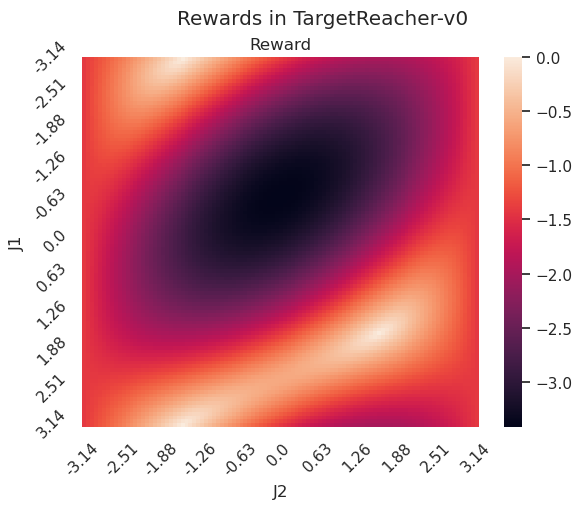

In [24]:
# Create the reward plot
num_ticks = 10
tick_skip = max(1, npoints // num_ticks)
tick_shift = 2*np.pi/npoints/2
tick_points = np.arange(npoints)[::tick_skip] + tick_shift
tick_labels = state_range.round(2)[::tick_skip]

sns.heatmap(rewards)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Reward")
plt.suptitle("Rewards in %s" % env_name)
plt.show()


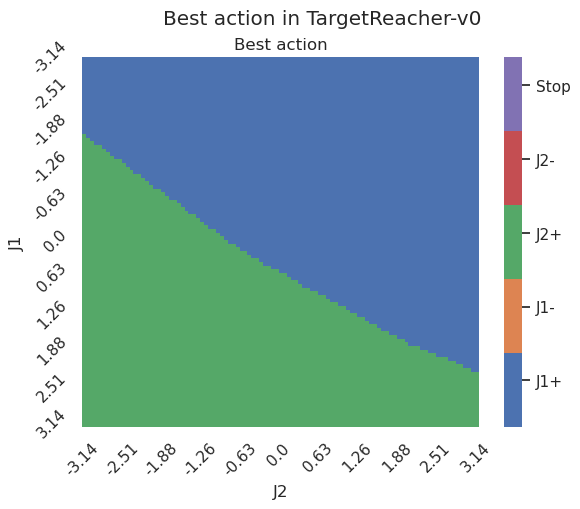

In [30]:
# # Create the policy plot
cmap = sns.color_palette("deep", action_space_dim)
sns.heatmap(actions, cmap=cmap, vmin=0, vmax=action_space_dim-1)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
colorbar = plt.gca().collections[0].colorbar
ticks = np.array(range(action_space_dim))*((action_space_dim-1)/action_space_dim)+0.5
colorbar.set_ticks(ticks)
if env.spec.id == "TargetReacher-v0": # fix the id.
    # In Reacher, we can replace 0..4 with more readable labels
    labels = ["J1+", "J1-", "J2+", "J2-", "Stop"]
else:
    labels = list(map(str, range(action_space_dim)))
colorbar.set_ticklabels(labels)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Best action")
plt.suptitle("Best action in %s" % env_name)
plt.show()

<a id='3.2.1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Achieved Performance (5 points) </h3> 

Where are the highest and lowest reward achieved?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Highest reward is achieved at the goal at $(1, 1)$; lowest reward is achieved at the point whose position is most distanced from the goal.

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Analysis of Behaviour (10 points) </h3> 

Did the policy learn to reach the goal from every possible state (manipulator configuration) in an optimal way (i.e. with lowest possible number of steps)? Why/why not?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Inspecting the reward and best action heatmap we obtained in task 4 section, it can be observed that the policy does not always reach the goal in an optimal way. For example, when the current tip locates at $(\text{J_1, J_2}) = (2.51, 1.88)$, we can learn from the policy heatmap that the optimal action will be moving toward $J_1$ direction, however the policy will apply $J_2$ then $J_1$ actions according to the best action heatmap.

# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex1.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:
- Task 1, WandB CartPole ```episodesep_reward``` plot
- x2 Task 4 reward plots

Ensure the correct model files are saved:
- results/model/CartPole-v1_params.pt
- results/model/SpinningReacher-v0_params.pt
- results/model/TargetReacher-v0_params.pt

## 4.1 Feedback <a id='4.1'></a>
1. Interesting exercise!
2. In the code block for ploting best action heatmap, `env.spec.id` should be `TargetReacher-v0`.
3. Training takes lots of time.

Please use the following section to record references.
# References <a id='5.'></a>

<a link=https://www.gymlibrary.dev/environments/mujoco/reacher/>Reacher - Gym Documentation</a>